In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal, Annotated
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.checkpoint.memory import MemorySaver

In [2]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

  messages: Annotated[list[BaseMessage], add_messages]

In [3]:
llm = ChatOpenAI()

def chat_node(state: ChatState ):
  # take user query from state
  messages = state['messages']

  # send to llm

  response = llm.invoke(messages)

  # response store state

  return {'messages':[response]}

In [11]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer = checkpointer)


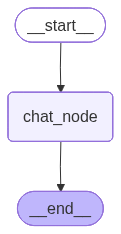

In [5]:
chatbot

In [8]:
initial_state = {
  'messages': [HumanMessage(content='What is the captial of Argentina')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of Argentina is Buenos Aires.'

In [12]:
thread_id = '1'

while True:

  user_message = input('Type here')

  print("User:",user_message)

  if user_message.strip().lower() in ['exit','bye','quit']:
    break

  config = {'configurable':{'thread_id':thread_id}}

  response = chatbot.invoke({'messages':HumanMessage(content=user_message)},config=config)
  
  print("AI:",response['messages'][-1].content)

User: hi my name is manish
AI: Hello Manish! How can I assist you today?
User: what is my name 
AI: Your name is Manish.
User: can you add 10 to 100
AI: Certainly! 10 + 100 = 110.
User: now can you multiply the result with 2
AI: Of course! 110 x 2 = 220.
User: exit


In [13]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is manish', additional_kwargs={}, response_metadata={}, id='f4762aea-f59c-4f07-b648-da1720056ab0'), AIMessage(content='Hello Manish! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 13, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CNE5MDkJEojKComHfBYX8vINQ4iwD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6f508070-b824-41d3-b21a-b64c8204c0a1-0', usage_metadata={'input_tokens': 13, 'output_tokens': 11, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), Human